In [9]:
import pandas as pd
import nltk

In [10]:
sentiment_df = pd.read_csv('data.csv')
sentiment_df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [11]:
sentiment_df.shape

(5842, 2)

In [12]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [13]:
sentiment_df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

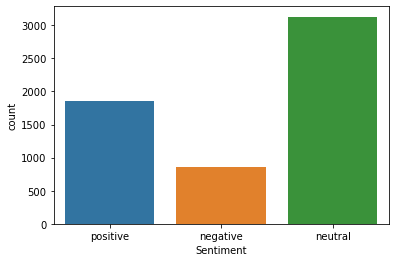

In [14]:
# Plot the count plot for the Sentiment
import seaborn as sns
sns.countplot(x = sentiment_df['Sentiment']) 

In [15]:
# Let's get the length of the sentence column
sentiment_df['(length)'] = sentiment_df['Sentence'].apply(len)
sentiment_df

,Sentence,Sentiment,(length)
0,The GeoSolutions technology will leverage Bene...,positive,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55
2,"For the last quarter of 2010 , Componenta 's n...",positive,193
3,According to the Finnish-Russian Chamber of Co...,neutral,128
4,The Swedish buyout firm has sold its remaining...,neutral,135
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107
5838,Nordic Walking was first used as a summer trai...,neutral,83
5839,"According shipping company Viking Line , the E...",neutral,99
5840,"In the building and home improvement trade , s...",neutral,88


In [88]:
sentiment_df.describe()

,(length)
count,5842.000000
mean,117.022253
std,56.420425
min,9.000000
25%,72.000000
50%,107.000000
75%,150.000000
max,315.000000


In [51]:
X = sentiment_df['Sentence']

In [52]:
y = sentiment_df['Sentiment']

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stop_words = stopwords.words('english')
punctuations = string.punctuation
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
sentiment_df_clean = sentiment_df['Sentence'].apply(message_cleaning)
sentiment_df_clean

0       [GeoSolutions, technology, leverage, Benefon, ...
1            [ESI, lows, 150, 250, BK, real, possibility]
2       [last, quarter, 2010, Componenta, net, sales, ...
3       [According, FinnishRussian, Chamber, Commerce,...
4       [Swedish, buyout, firm, sold, remaining, 224, ...
                              ...                        
5837    [RISING, costs, forced, packaging, producer, H...
5838    [Nordic, Walking, first, used, summer, trainin...
5839    [According, shipping, company, Viking, Line, E...
5840    [building, home, improvement, trade, sales, de...
5841    [HELSINKI, AFX, KCI, Konecranes, said, order, ...
Name: Sentence, Length: 5842, dtype: object

In [35]:
# Obtain only the positive reviews
positive = sentiment_df_clean[sentiment_df['Sentiment'] == 'positive']
positive

0       [GeoSolutions, technology, leverage, Benefon, ...
2       [last, quarter, 2010, Componenta, net, sales, ...
5            [SPY, wouldnt, surprised, see, green, close]
8       [Kone, net, sales, rose, 14, yearonyear, first...
10      [Circulation, revenue, increased, 5, Finland, ...
                              ...                        
5819    [Last, month, added, GILD, position, started, ...
5824    [newly, formed, company, YIT, Stavo, local, co...
5825    [Friends, Life, lifts, profits, 38, hikes, div...
5836    [Daily, Mail, parent, company, talks, potentia...
5841    [HELSINKI, AFX, KCI, Konecranes, said, order, ...
Name: Sentence, Length: 1852, dtype: object

In [36]:
# Obtain only the positive reviews
neutral = sentiment_df_clean[sentiment_df['Sentiment'] == 'neutral']
neutral

3       [According, FinnishRussian, Chamber, Commerce,...
4       [Swedish, buyout, firm, sold, remaining, 224, ...
9       [Stockmann, department, store, total, floor, s...
13                     [Viking, Line, canceled, services]
14      [Ahlstrom, Corporation, STOCK, EXCHANGE, ANNOU...
                              ...                        
5833    [2008, Kemira, recorded, revenue, approximatel...
5834    [Investments, product, development, stood, 60,...
5838    [Nordic, Walking, first, used, summer, trainin...
5839    [According, shipping, company, Viking, Line, E...
5840    [building, home, improvement, trade, sales, de...
Name: Sentence, Length: 3130, dtype: object

In [37]:
# Obtain only the positive reviews
negative = sentiment_df_clean[sentiment_df['Sentiment'] == 'negative']
negative

1            [ESI, lows, 150, 250, BK, real, possibility]
6       [Shells, 70, Billion, BG, Deal, Meets, Shareho...
7       [SSH, COMMUNICATIONS, SECURITY, CORP, STOCK, E...
11      [SAP, Q1, disappoints, software, licenses, Rea...
39      [AAPL, afternoon, selloff, usual, brutal, get,...
                              ...                        
5829           [SBUX, PM, DB, downgrade, PT, cut, 70, 64]
5831    [Finnish, developer, manufacturer, mobile, pho...
5832    [Operating, profit, fell, EUR, 381, mn, EUR, 5...
5835    [HSBC, Says, Unit, Book, 585, Million, Charge,...
5837    [RISING, costs, forced, packaging, producer, H...
Name: Sentence, Length: 860, dtype: object

In [38]:
# Convert to list format
sentences_pos = positive.tolist()
len(sentences_pos)

1852

In [39]:
# Convert to list format
sentences_neu = neutral.tolist()
len(sentences_neu)

3130

In [40]:
# Convert to list format
sentences_neg = negative.tolist()
len(sentences_neg)

860

In [42]:
sentiment_df['Sentence'][10]

'Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .'

In [43]:
sentiment_df_clean[10]

['Circulation', 'revenue', 'increased', '5', 'Finland', '4', 'Sweden', '2008']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
sentiment_countvectorizer = vectorizer.fit_transform(sentiment_df['Sentence'])
# print(vectorizer.get_feature_names())

['0', '00', '000', '000063', '0008', '001', '002', '0025', '003', '0030', '004', '005', '006', '008', '009', '01', '010', '01011385', '011', '011200', '012', '013', '01312011', '014', '015', '016', '017', '018', '01872740', '02', '020', '021', '022011', '025', '026', '027', '028', '029', '03', '030', '03022011', '0304', '031', '032', '033', '034', '035', '036', '037', '038', '03c', '04', '040', '042', '043', '044', '045', '047', '048', '049', '0491', '05', '050', '052', '053', '056', '06', '060', '061', '062', '0623', '0625', '063', '064', '066', '067', '07', '070', '0711', '075', '0762', '077', '078', '08', '080', '081', '083', '085', '086', '087', '09', '090', '0900', '0901', '091', '092', '0930', '095', '1', '10', '100', '1000', '10000', '100000', '10000odd', '10012', '100120', '1002', '1007', '100m', '100millilitre', '100mn', '100mn150mn', '100pt', '101', '1010', '10113', '1014', '1015', '1015mn', '1019', '10199', '102', '1022', '1026', '10270', '10277', '1028', '103', '1030', '103

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
print(sentiment_countvectorizer.toarray)

<bound method _cs_matrix.toarray of <5842x14194 sparse matrix of type '<class 'numpy.int64'>'
	with 68925 stored elements in Compressed Sparse Row format>>


In [59]:
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,14184,14185,14186,14187,14188,14189,14190,14191,14192,14193
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
sentiment_countvectorizer.shape

(5842, 14194)

In [61]:
reviews = pd.DataFrame(sentiment_countvectorizer.toarray())

In [62]:
# defining Sentiments:
sentiments = ['negative' , 'neutral', 'positive']
Y = y.apply(lambda x: sentiments.index(x))
#Let’s check Y that it has correctly changed or not:
Y.head()

0    2
1    0
2    2
3    1
4    1
Name: Sentiment, dtype: int64

In [63]:
X.shape

(5842, 14194)

In [64]:
y.shape

(5842,)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
NB_classifier = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier.fit(X_train, y_train)
train = NB_classifier.score(X_train, y_train)
test = NB_classifier.score(X_test, y_test)
print('Accuracy for training data in NB: {}'.format(train))
print('Accuracy for testing data in NB: {}'.format(test))

Accuracy for training data in NB: 0.8619730365931949
Accuracy for testing data in NB: 0.6732249786142002


In [86]:
from sklearn.model_selection import cross_val_score
train = cross_val_score(NB_classifier, X_train, y_train, cv = 5)
test = cross_val_score(NB_classifier, X_test, y_test, cv = 5)
print('After applying simple cross validation to the NB algorithm')
print('Accuracy for training data: {}'.format(train))
print('The mean for the training data: {}'.format(train.mean()))
print('Accuracy for testing data: {}'.format(test))
print('Mean for the testing data: {}'.format(test.mean()))

After applying simple cross validation to the NB algorithm
Accuracy for training data: [0.65454545 0.62459893 0.65668449 0.69271949 0.64775161]
The mean for the training data: 0.6552599938164871
Accuracy for testing data: [0.62393162 0.64102564 0.64102564 0.62393162 0.66523605]
Mean for the testing data: 0.6390301162833352


In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
train = cross_val_score(NB_classifier, X_train, y_train, cv=kfold)
test = cross_val_score(NB_classifier, X_test, y_test, cv=kfold)

print('After applying the Stratified K fold cross validation on NB we got the following result.')
print("Training data for NB:\n{}".format(train))
print('The mean for training data:{}'.format(train.mean()))
print('The testing data: {}'.format(test.mean()))

After applying the Stratified K fold cross validation on NB we got the following result.
Training data for NB:
[0.6513369  0.65989305 0.64385027 0.64132762 0.63490364]
The mean for training data:0.6462622954574082
The testing data: 0.6586919041854664


<AxesSubplot:>

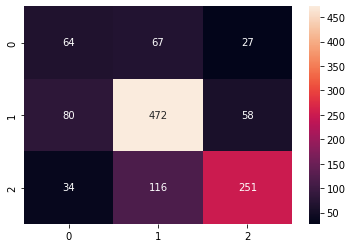

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, fmt = 'g', annot = True)

In [71]:
print('Confusion matrex for NB: {}'.format(classification_report(y_test, y_predict_test)))

Confusion matrex for NB:               precision    recall  f1-score   support

    negative       0.36      0.41      0.38       158
     neutral       0.72      0.77      0.75       610
    positive       0.75      0.63      0.68       401

    accuracy                           0.67      1169
   macro avg       0.61      0.60      0.60      1169
weighted avg       0.68      0.67      0.67      1169



In [89]:
# logistic regression model cross validation using kfold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression().fit(X_train, y_train)

train = logreg.score(X_train, y_train)
test = logreg.score(X_test, y_test)
print('Training data: {}'.format(train))
print('Testing data: {}'.format(test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data: 0.9285255724374064
Testing data: 0.6355859709153122


In [90]:
score = cross_val_score(logreg, X, y, cv = 5)
print('Simple K-fold cross validation: {}'.format(score))
print('The mean: {}'.format(score.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Simple K-fold cross validation: [0.63216424 0.65012831 0.64383562 0.64554795 0.6489726 ]
The mean: 0.6441297444250441


In [91]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
score = cross_val_score(logreg, X, y, cv=kfold)
                        
print("Stratified K-fold cross validation:\n{}".format(score))
print('The mean {}'.format(score.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Stratified K-fold cross validation:
[0.65098375 0.64242943 0.63869863 0.63955479 0.64811644]
The mean 0.6439566073332786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.23      0.20      0.22       169
     neutral       0.64      0.78      0.70       601
    positive       0.82      0.60      0.69       399

    accuracy                           0.64      1169
   macro avg       0.56      0.53      0.54      1169
weighted avg       0.64      0.64      0.63      1169



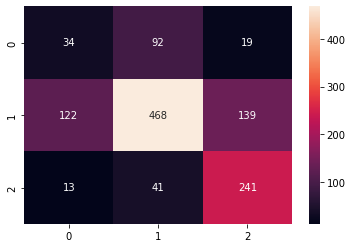

In [92]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, fmt = 'g', annot = True)

print(classification_report(y_test, y_pred))

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [94]:
score = cross_val_score(knn, X, y, cv = 5)
print('Simple K-fold cross validation for KNN: {}'.format(score))
print('The mean: {}'.format(score.mean()))

Simple K-fold cross validation for KNN: [0.54491018 0.54234388 0.54880137 0.54195205 0.54366438]
The mean: 0.5443343743042292


In [95]:
from sklearn.model_selection import KFold
KFold = KFold(n_splits=5, shuffle=True, random_state=0)

score = cross_val_score(knn, X, y, cv = KFold)
test = cross_val_score(knn, X_test, y_test, cv = KFold)
print('Testing: {}'.format(test.mean()))
print('Stratified Kfold cross validation for KNN: {}'.format(score))
print('The mean: {}'.format(score.mean()))

Testing: 0.5072594548989399
Stratified Kfold cross validation for KNN: [0.55175364 0.51668092 0.53510274 0.56592466 0.54452055]
The mean: 0.5427965009316006


              precision    recall  f1-score   support

    negative       0.31      0.12      0.17       169
     neutral       0.52      0.93      0.67       601
    positive       0.68      0.07      0.12       399

    accuracy                           0.52      1169
   macro avg       0.50      0.37      0.32      1169
weighted avg       0.54      0.52      0.41      1169



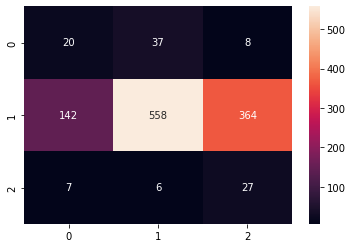

In [96]:
# knn.fit(X=X_train, y=y_train)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, fmt = 'g' , annot = True)

print(classification_report(y_test, y_pred))

In [97]:
# bellow code is to find out the best parameter either c or gama or both for our algorithm

In [98]:
logreg100 = LogisticRegression(C=0.22).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.893
Test set score: 0.640
